In [5]:
from datasets import load_dataset

dataset = load_dataset("ai-for-obs/handwritten-smhi-9k", split="train").to_pandas()

Found cached dataset parquet (/home/a002487/.cache/huggingface/datasets/ai-for-obs___parquet/ai-for-obs--handwritten-smhi-9k-5fbe751a1fad1d5b/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


In [25]:
df = dataset.rename(columns={"__index_level_0__": "filename"}).set_index("filename")

<Axes: >

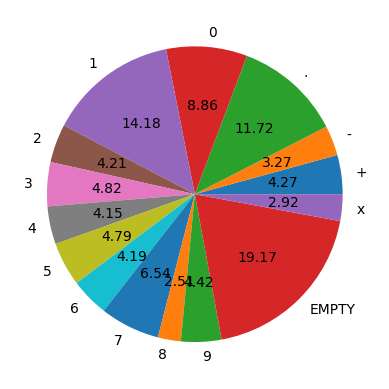

In [26]:
autopct = "%.2f"
df.drop(columns=["text"]).sum(axis=0).plot.pie(autopct=autopct)

In [54]:
from statistics import median_high
import pandas as pd

def empty_median(text):
    if not text:
        return "EMPTY"
    else:
        return median_high(text)

df_median = pd.DataFrame({"text": df.text, "char_median": df.text.apply(empty_median)})

In [63]:
df_median.head()

text char_median
filename                   
320032.png    6           6
524858.png    9           9
276231.png    2           2
332843.png    3           3
529931.png            EMPTY

<Axes: ylabel='count'>

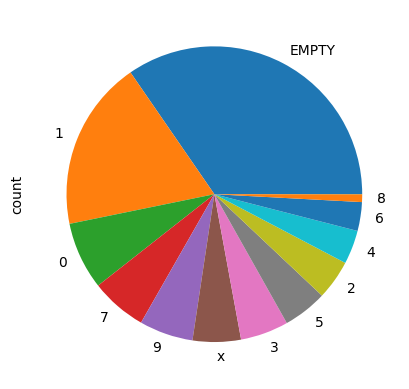

In [57]:
df_median.char_median.value_counts().plot.pie()

# Scikit-learn splits

In [58]:
from sklearn.model_selection import GroupKFold

In [81]:
gkf = GroupKFold(n_splits=2)

In [82]:
folds = gkf.split(df_median.index, df_median.char_median, groups=df_median.char_median)

In [84]:
train, test = next(folds)

<Axes: ylabel='count'>

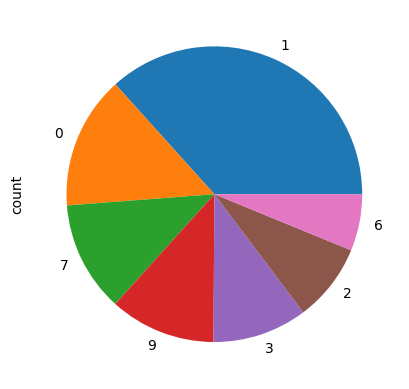

In [86]:
df_median.iloc[train].char_median.value_counts().plot.pie()

<Axes: ylabel='count'>

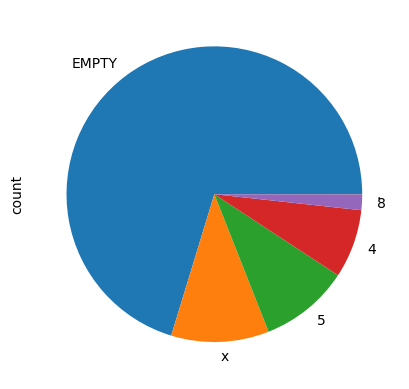

In [87]:
df_median.iloc[t].char_median.value_counts().plot.pie()

In [92]:
from sklearn.model_selection import train_test_split
target = pd.get_dummies(df_median.char_median)
target.head()

.      0      1      2      3      4      5      6      7  \
filename                                                                    
320032.png  False  False  False  False  False  False  False   True  False   
524858.png  False  False  False  False  False  False  False  False  False   
276231.png  False  False  False   True  False  False  False  False  False   
332843.png  False  False  False  False   True  False  False  False  False   
529931.png  False  False  False  False  False  False  False  False  False   

                8      9  EMPTY      x  
filename                                
320032.png  False  False  False  False  
524858.png  False   True  False  False  
276231.png  False  False  False  False  
332843.png  False  False  False  False  
529931.png  False  False   True  False

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_median, target,test_size=0.2, random_state=0, shuffle=True, stratify=target)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# Imbalanced learn

In [124]:
X_sans_filename_col, y = df_median, df_median.char_median

In [128]:
X = X_sans_filename_col.reset_index()
X.head()

filename text char_median
0  320032.png    6           6
1  524858.png    9           9
2  276231.png    2           2
3  332843.png    3           3
4  529931.png            EMPTY

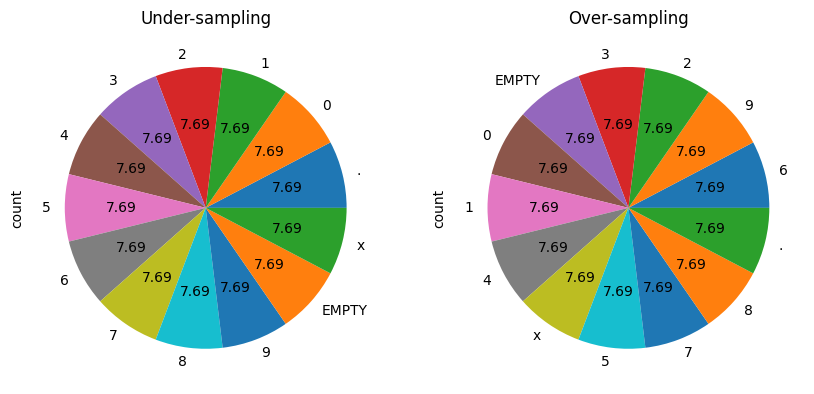

In [129]:
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


sampling_strategy =  "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

Xu, yu = X_res, y_res

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")

Xo, yo = X_res, y_res

In [130]:
Xu

filename   text char_median
6256    2879.png    -5.           .
4921    5128.png  +10.0           0
657   534280.png  +11.7           1
6408  263441.png   41.2           2
7169  263689.png  732.4           3
281   537382.png   -6.4           4
3048  525334.png      5           5
8759  273423.png      6           6
3890  537113.png   77.4           7
2425  271913.png      8           8
6822  268070.png      9           9
7222    1585.png              EMPTY
5719    3907.png      x           x

In [131]:
Xo

filename text char_median
0      320032.png    6           6
1      524858.png    9           9
2      276231.png    2           2
3      332843.png    3           3
4      529931.png            EMPTY
...           ...  ...         ...
41166  528947.png    x           x
41167  281643.png    x           x
41168  280879.png    x           x
41169  265263.png    x           x
41170  274727.png    x           x

[41171 rows x 3 columns]

In [132]:
X

filename text char_median
0      320032.png    6           6
1      524858.png    9           9
2      276231.png    2           2
3      332843.png    3           3
4      529931.png            EMPTY
...           ...  ...         ...
9148   271391.png   10           1
9149   269828.png    7           7
9150     7218.png    9           9
9151  1573382.png    4           4
9152     1568.png            EMPTY

[9153 rows x 3 columns]

# To do:

1. Combine SMHI + CVL strings + Dida datasets
2. Split into train, test and validation datasets
3. Oversample and balance, all three
4. Augmentation on repeated files